In [ ]:
import matplotlib.pyplot as plt
import numpy as np
!pip install opencv-python
import cv2 as cv

In [25]:
class ClickCorrespondence:
    def __init__(self, img1, img2):
        self.fig, self.ax = plt.subplots(1, 2)
        self.button_event = self.fig.canvas.mpl_connect('button_press_event', self.button_press_event)
        self.pts = [[], []]
        self.ax[0].imshow(img1)
        self.ax[1].imshow(img2)
        
    def button_press_event(self, event):
        print('click', event)
        if event.inaxes:
            x, y = event.xdata, event.ydata
            event.inaxes.plot(x, y, 'ro')
            idx = np.argwhere(self.ax == event.inaxes).flatten()[0]
            self.pts[idx].append((x, y))
        self.fig.canvas.flush_events(); plt.show(block=False)


Make sure two images are of the same size before uploading. Use photo editing tool to crop the image if necessary. Click coresponding points in two images in the same order. 

<IPython.core.display.Javascript object>


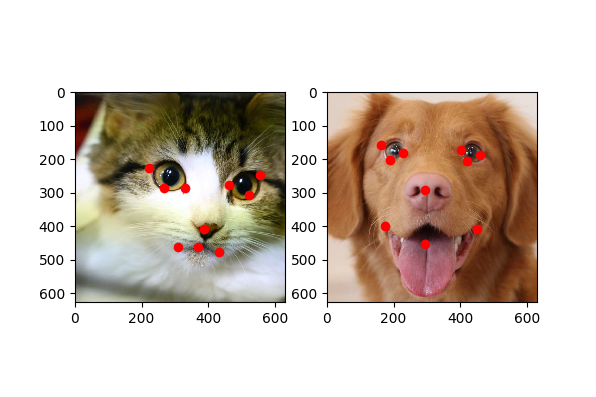

In [60]:
%matplotlib notebook
img1 = plt.imread('cat.jpg')
img2 = plt.imread('dog.jpg')
a = ClickCorrespondence(img1, img2)
plt.show()

In [61]:
a_np = np.array(a.pts)

In [62]:
H, _ = cv.findHomography(a_np[0], a_np[1])

In [63]:
img1_warped = cv.warpPerspective(img1, H, img2.shape[:2])

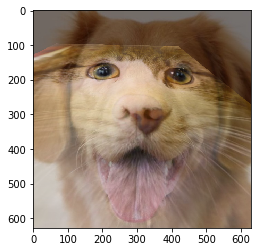

In [64]:
%matplotlib inline
plt.imshow(img1_warped.astype(np.float32)/255 * 0.5 + img2.astype(np.float32)/255 * 0.5)

In [ ]:
plt.imsave('img1.png', img1_warped)
plt.imsave('img2.png', img2)